**Import necessary packages**<br>
**Numpy    - For mathematical calculations**<br>
**Seaborn  - For Data Visualization**<br>
**matplot  - For Plottings**<br>
**warnings - To ignore any warning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 
import seaborn as sns
from numpy import exp 
import warnings
warnings.filterwarnings("ignore")

**Read the Test and Train dataset by using pandas**

In [2]:
train=pd.read_csv("D:\intern\TR1.csv")
test=pd.read_csv("D:\intern\TE1.csv")

**Let's make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.** 

In [3]:
train_original=train.copy()
test_original=test.copy()

####  Understanding the data
we will check the features present in our data and then we will look at their data types.

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**we have 12 independent variables and one dependent variable in the training data set**

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

**We have similar features in the test dataset as the train dataset expect the Loan_status.We will predict the Loan_status using the model built using the train data.**

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**we can see there are three format of data types:**<br>
-  Object : Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employesd, Property_Area, Loan_Status<br>
- int64 :It represnts the integer variables.ApplicantIncome is of the format.<br>
- float64 : It represents the variable which have some decimal values involved. They are also numerical variables.Numerical variables in our dataset are: CoapplicantIncome, Loan_Amount_Term and Credit_History.

In [9]:
print("train_shape = ",train.shape)
print("test_shape = ",test.shape)

train_shape =  (614, 13)
test_shape =  (367, 12)


**we have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test data set**

# Univariate Analysis:
Univariate Analysis is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular varibales.For numerical features, probability density plots can be used to look at the distribution of the variable.

- we will first look at the Target Variable, i.e.,Loan_Status.As it is a categorical variable,let us look as its frequency table,perctenage distribution and bar plot. <br>
- Normalize can be set to TRUE to print proportions instead of number count.

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot: >

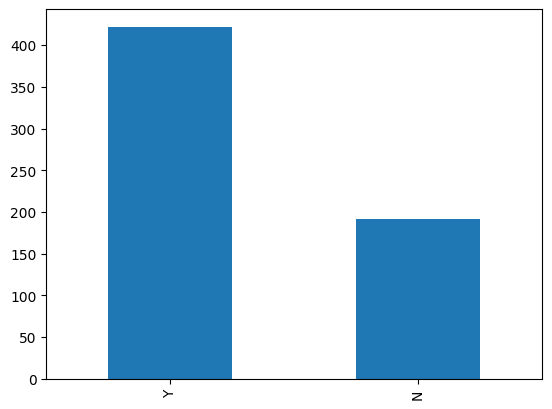

In [12]:
train['Loan_Status'].value_counts().plot.bar()

**The loan of 422(around 69%) out of 614 was approved**<br>
we will visualize each variable separately.Different types of variables are Caegorical ,ordianl,and numerical.<br>
-**Categorical Features**: These features have categories(Gender,Married,Self_Employed,Credit_History,Loan_Status<br>
-**Ordinal Features** : Variables in categorical features having  some order involved(Dependents,Education,Property_Area)<br>
-**Numerical Features** : These features have numerical values(ApplicantIncome,LoanAmount,Loan_Amount_Term)


## Independnet Variables(Categorical):


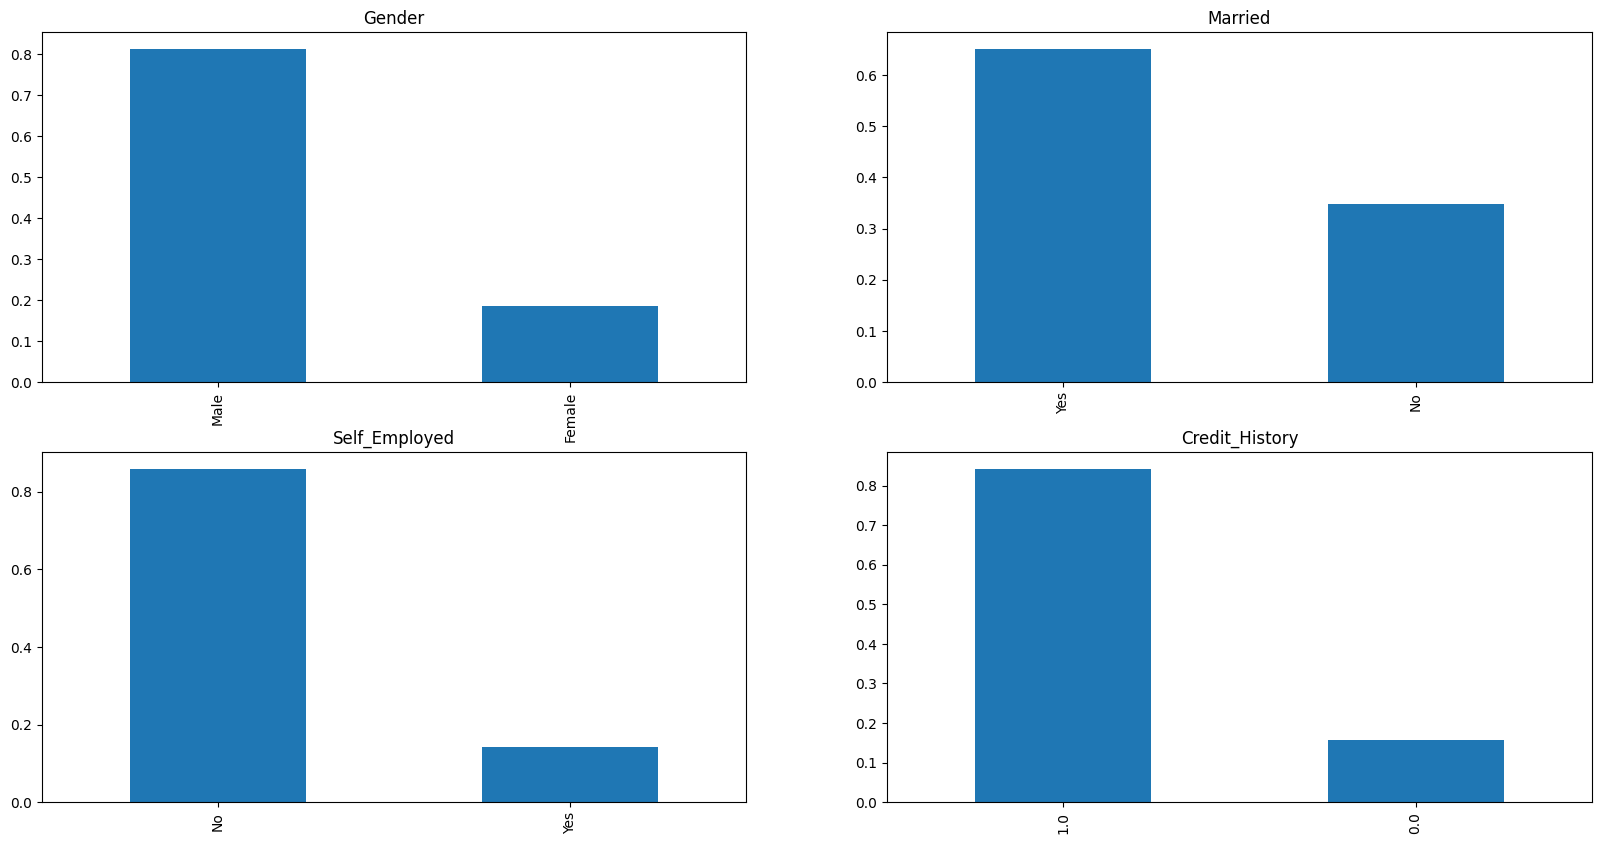

In [13]:
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

**From the above bar plots we can conclude that**<br>
- 80% applicants in the dataset are male<br>
- Around 65% of the applicants are married<br>
- Around 15% are self employed<br>
- Around 85% clients paid their loan

##  Independent Variable(Ordinal):

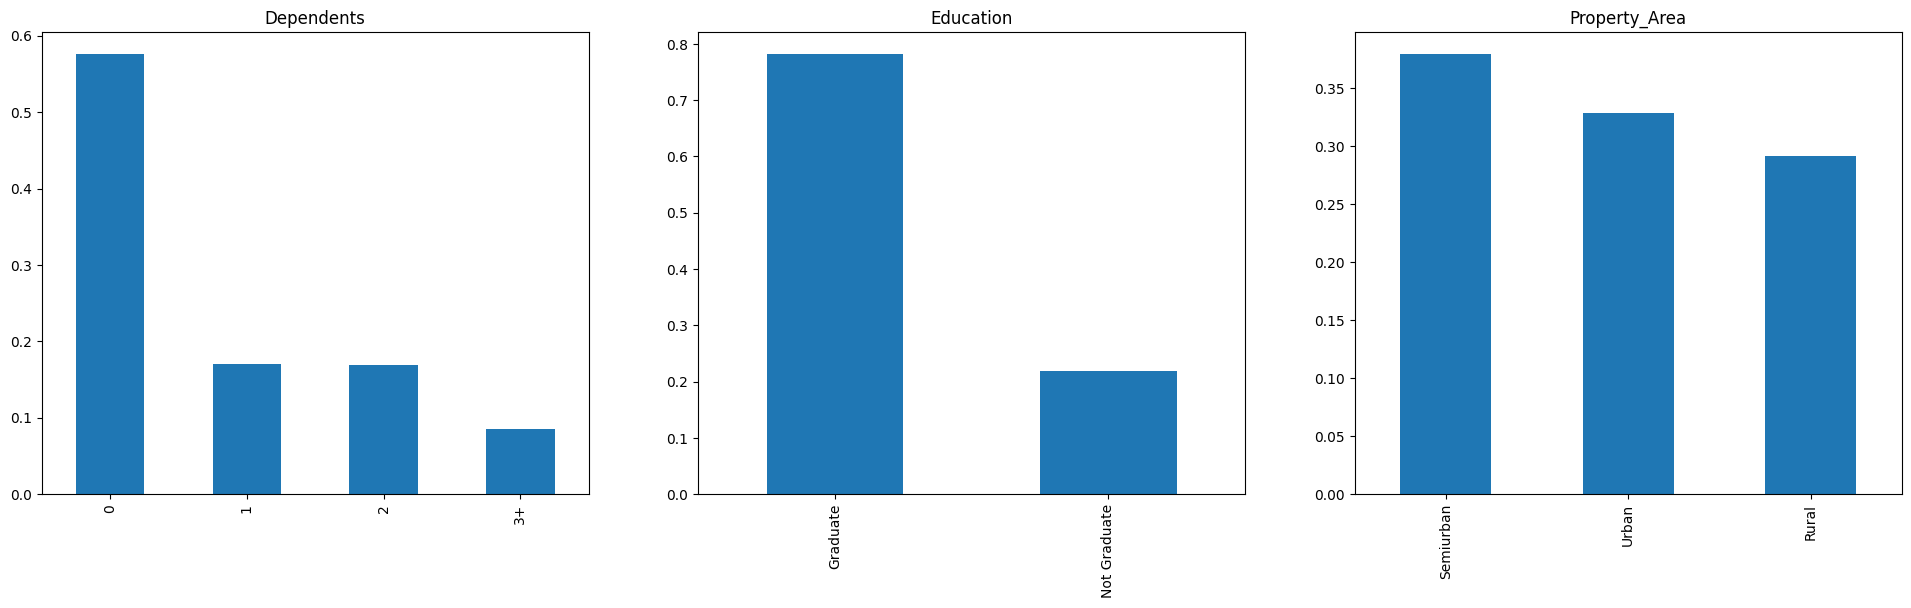

In [14]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

**From the above Bar Plot, we can conclude that**<br>
- Most of applicants does not have dependents<br>
- About 80% are graduates
- Applicants are more from semi-urban followed by urban and rural.

## Independent Variables(Numerical)
we will consider both float and int numerical features.<br>
At first we are considering ApplicantIncome

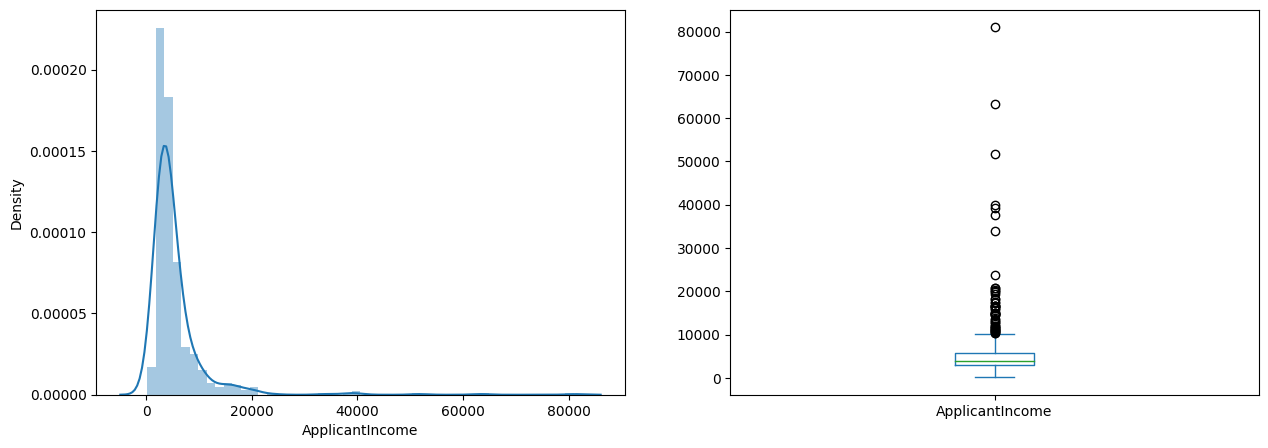

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(15,5))
plt.show()

From the above plot we can conclude that the data is not normally distributed. <br>
From the box plot we can conclude that there were the extereme presence of outliers.This is because the variation while approving loan based on different factors such as Education.Now we will see the outliers in the presence of education feature.

Text(0.5, 0.98, '')

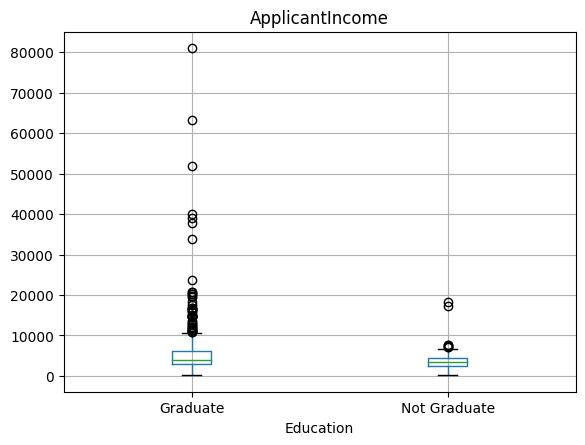

In [16]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

The outliers are the people who are graduates with high income.Let's see the box plot and distribution of coapplicantIncome , LoanAmount, Loan_Amount_Term data.

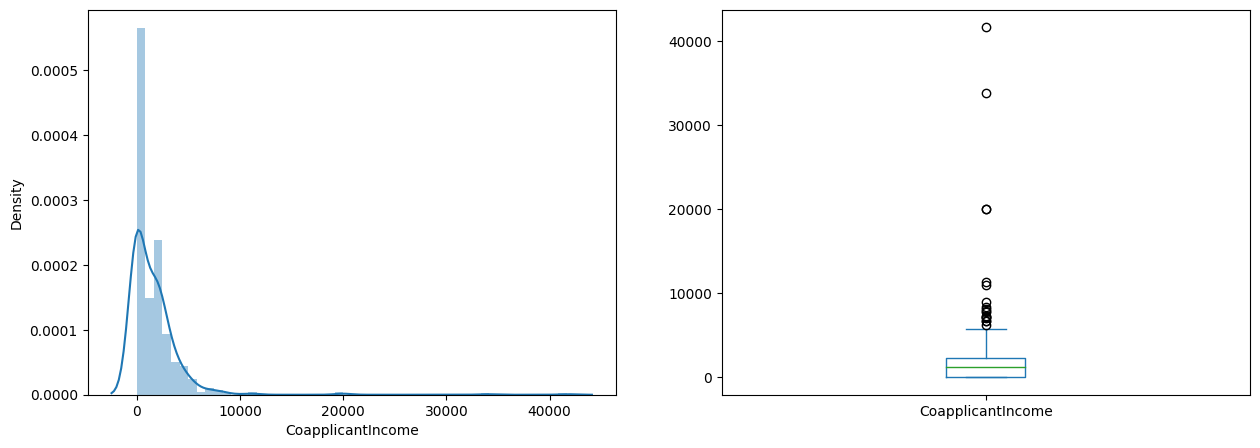

In [17]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(15,5))
plt.show()

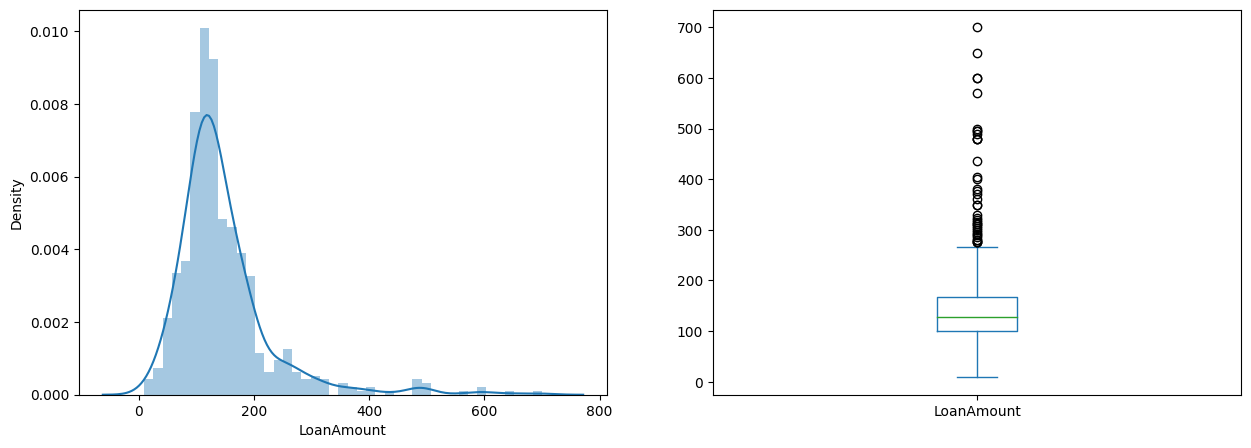

In [18]:
plt.subplot(121)
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(15,5))
plt.show()

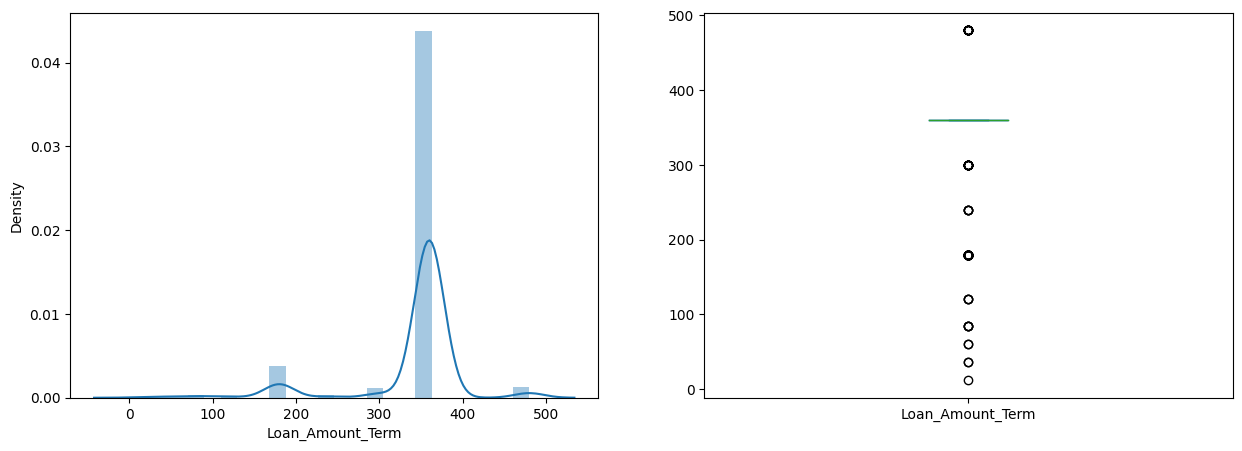

In [19]:
plt.subplot(121)
sns.distplot(train['Loan_Amount_Term']);
plt.subplot(122)
train['Loan_Amount_Term'].plot.box(figsize=(15,5))
plt.show()

From the above graphs we conclude that<br>
- In CoapplicantIncome , it is not normally distributed and has the presence of outliers.
- In LoanAmount, it is fairly distributed and has the presence of extreme outliers.
- The Loan_Amount_term is no need to plot, beacuse it is a period of time to repay the loan, where mostly the time is allocate to all is 360 ,and for others it would differnet based on the amount and it contains few outliers

In [20]:
df=train.drop('Loan_ID',axis=1)

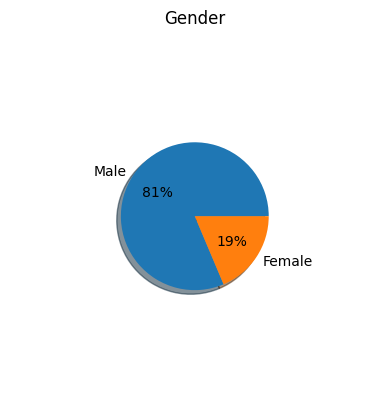

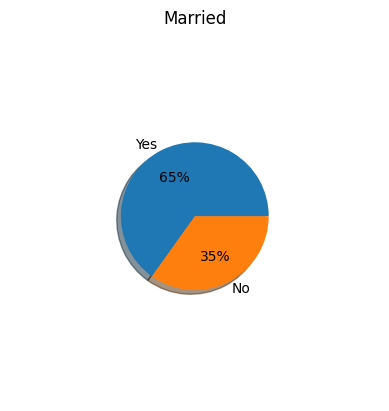

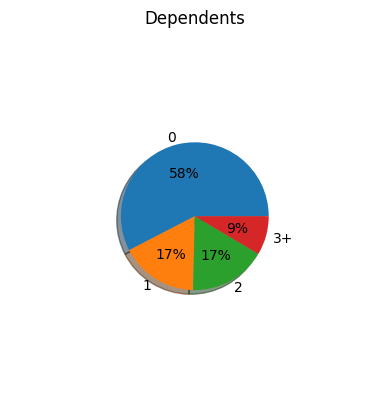

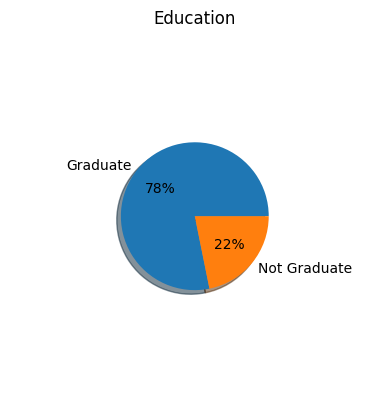

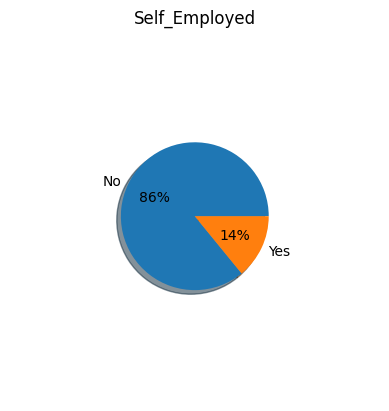

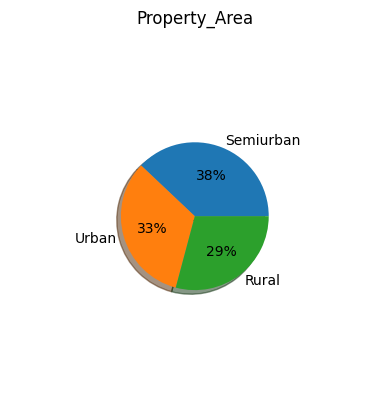

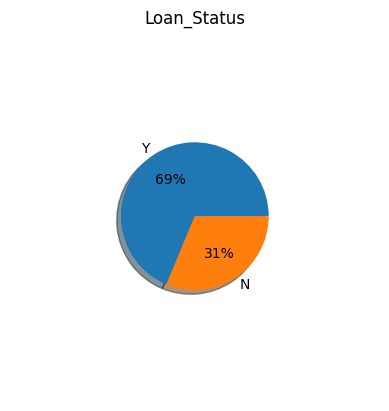

In [21]:
# Loop through each feature and generate a pie chart
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the feature is categorical
        counts = df[col].value_counts()
        plt.pie(counts, labels=counts.index,radius=0.5,autopct="%0.0f%%",shadow=True)
        plt.title(col)
        plt.show()

## Bivariate Analysis
Bivariate analysis is one of the statistical analysis where two variables are observed. One variable here is dependent while the other is independent.From the above information, we have got some hypothesis<br>
- Applicants with high income have more chances of loan approval.
- Appicants who have a Credit history has 98% of chance for loan approval.
- Loan approval should also depend on the loan amount.If the loan amount is less, chances of loan approval is more.
- Lesser the amount while repay,having more chances of loan approval.

## Categorical independent Variable vs Target Variable
At first we will consider the relation between Gender and target variable which is Loan status by using a stacked chart.
- **A stacked chart is a form of bar chart that shows the composition and comparison of a few variables, either relative or absolute, over time. Also called a stacked bar or column chart, they look like a series of columns or bars that are stacked on top of each other.**


<AxesSubplot: xlabel='Gender'>

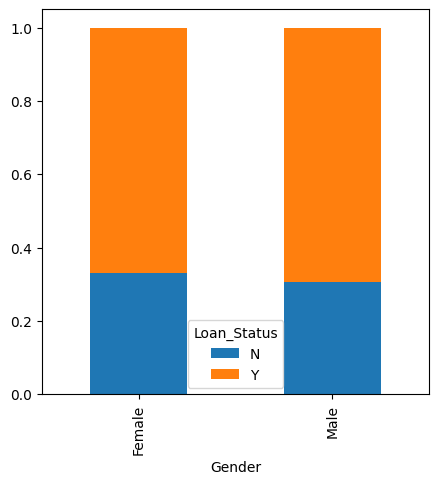

In [22]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

From the above stacked graph we got ,that the male and female applicants more or less same for both approved and unapproved loans.
<br>
Now let us consider remaining features with target variable.

<AxesSubplot: xlabel='Self_Employed'>

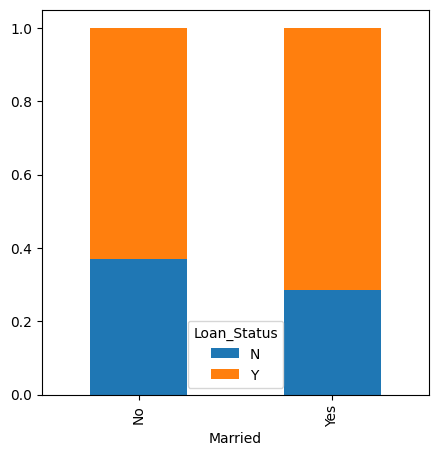

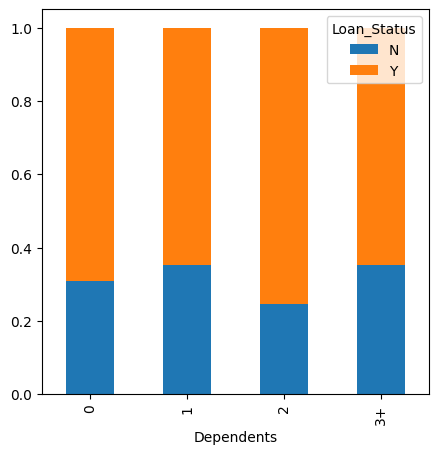

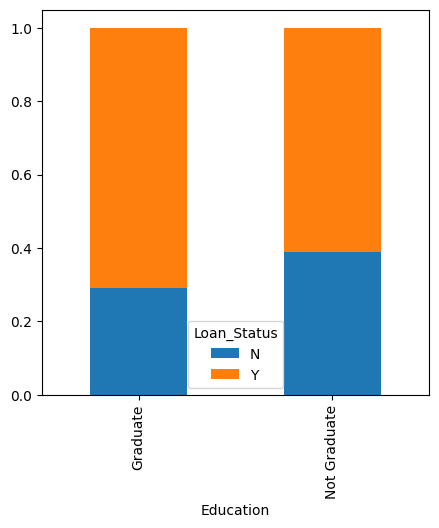

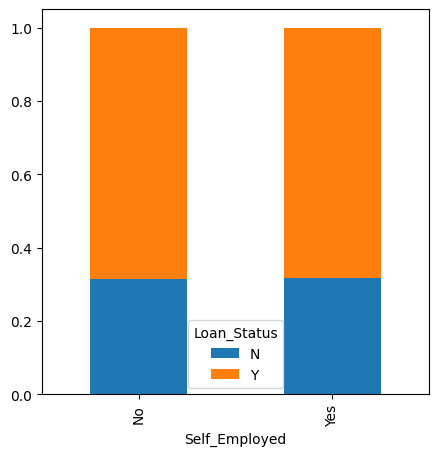

In [23]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
self_Employed.div(self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 and 3+ dependents is similar.
- No significant from self employes vs Loan_Status,

<AxesSubplot: xlabel='Property_Area'>

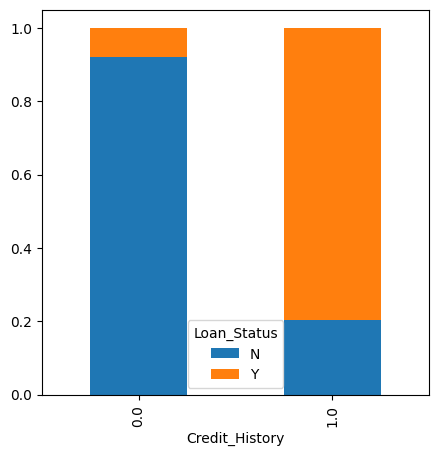

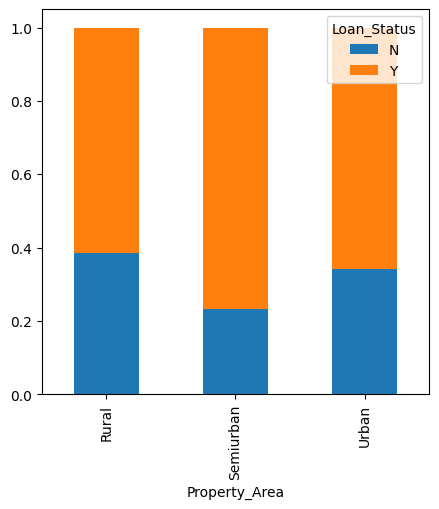

In [24]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

## Numerical Independent Variable vs Target Variable
We will find the mean of the applicants for who the loan was approved and not approved

<AxesSubplot: xlabel='Loan_Status'>

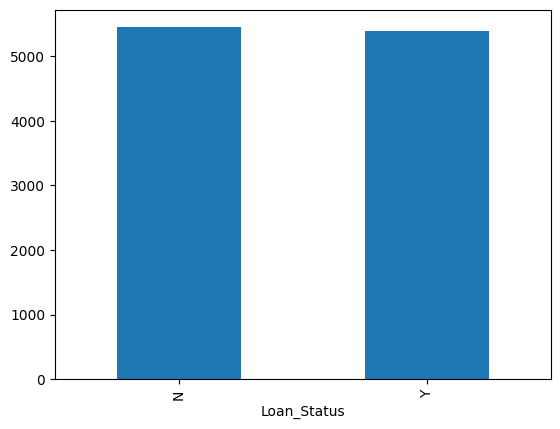

In [25]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

The y-axis represents the meam of applicant income.Here, we did not get any difference.Let's consider the stacked Bar and apply the bins. Bins means we are going to divide the mean of applicant income in a range as low, average,high and very high

In [26]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High',"Very High"]

In [27]:
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])

Text(0, 0.5, 'Percentage')

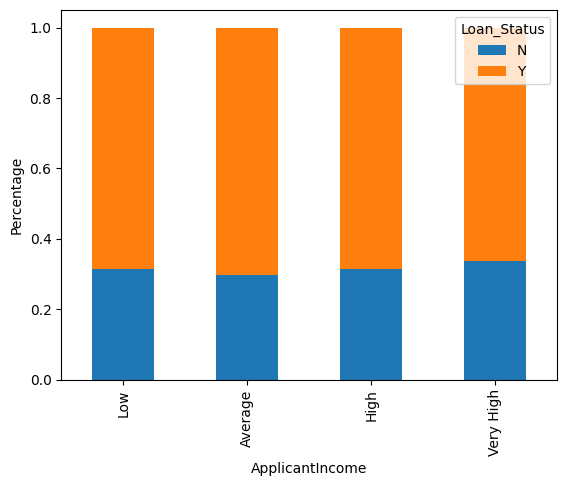

In [28]:
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

So, from the above graph we conclude that the applicant income does not affect the loan approval. There is slight high chances if the income is high the chance of approval is high a bit.<br>
We will analyze the coapplicant income and loan amount variable in similar manner.

In [29]:
bins=[0,1000,3000,42000]
group=['Low','Average',"High"]

Text(0, 0.5, 'Percentage')

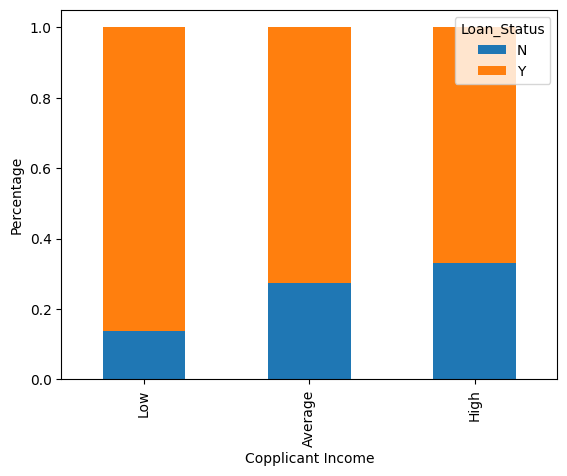

In [30]:
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Copplicant Income')
plt.ylabel('Percentage')

It is not accurate because if the coapplicant income is less the chance of approval is high, this is beacuse most of the applicants don't have any coapplicant.So this is incorrect we will conside the combination of Coapplicant and applicant income to give  a Total  income with respective target variable Loan_status 

Text(0, 0.5, 'Percentage')

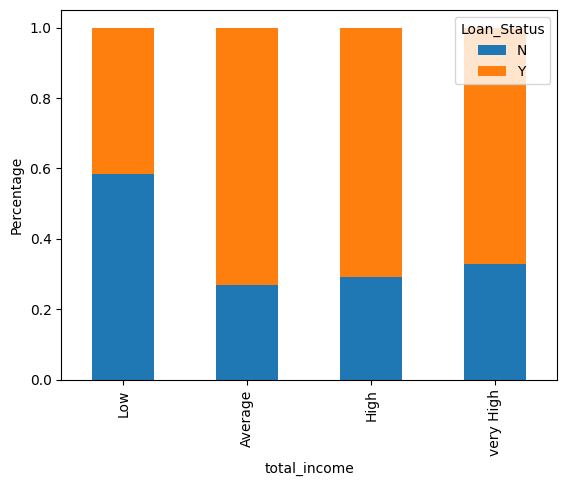

In [31]:
train['total_income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','very High']
train['Total_Income_bin']=pd.cut(train['total_income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('total_income')
plt.ylabel('Percentage')

Here, we can conclude that from the above graph that who's total income is less is there a great chance of approval of loan.<br>
Let's consider the Loan amount variable

In [32]:
bins=[0,100,200,700]
group=['Low','Average','High']

In [33]:
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])

Text(0, 0.5, 'Percentage')

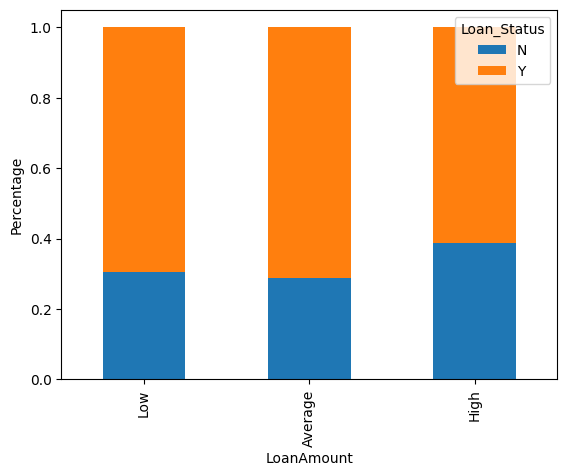

In [34]:
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is highrt for low and Average Loan amount compared to high loan amount than remaining factors.<br>
Let us drop the created columns.And we will change the 3+ in dependent variable to 3 to make a numerical variable.we will consider the target variable to 0 and 1.

In [35]:
train=train.drop(['Coapplicant_Income_bin'],axis=1)

In [36]:
train=train.drop(['total_income'],axis=1)

In [37]:
train=train.drop(['LoanAmount_bin'],axis=1)

In [38]:
train=train.drop(['Income_bin'],axis=1)

In [39]:
train=train.drop(['Total_Income_bin'],axis=1)


In [40]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Multivariate Analysis


we will see the correlation between all numerical variables.
- Correlation is the statistical measure of the relationship between two variables.
- Simply we can say that correlation describes how one variable is connected to each other..
- Positive Correlation: Two features (variables) can be positively correlated with each other. It means that when the value of one variable increase then the value of the other variable(s) also increases.
- Negative Correlation: Two features (variables) can be negatively correlated with each other. It means that when the value of one variable increase then the value of the other variable(s) decreases.
- We will visualize the correlation by using heat map.
- Heat Map visialize data through variations in coloring.
- The variables with darker colors means the correlation is more between those variables
- The correlation matrix shows how the variables are correlated to each other on a scale of -1 to 1, with 1 being a perfect positive correlation and -1 being a perfect inverse correlation.

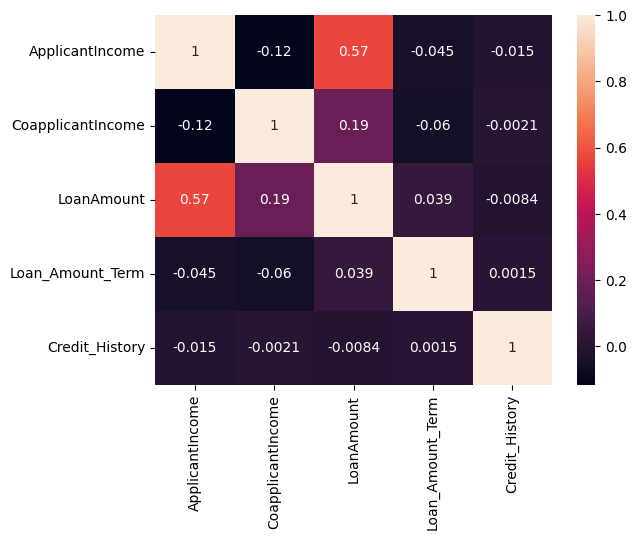

In [41]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()



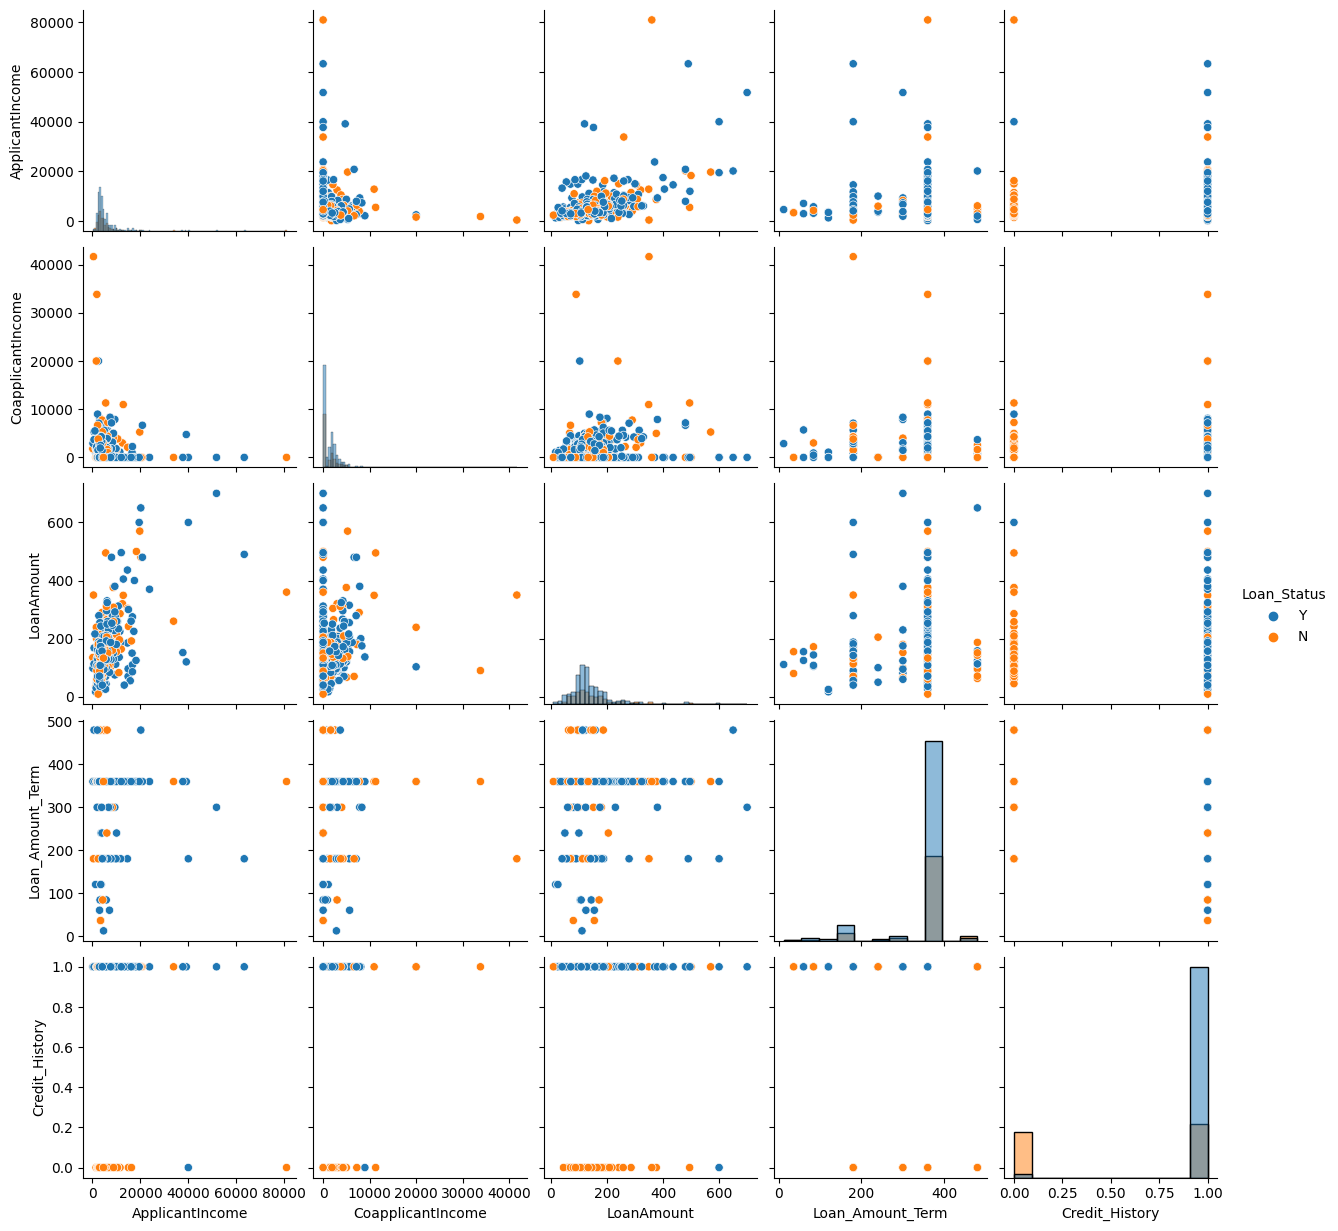

In [42]:

sns.pairplot(train, vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History'], diag_kind='hist', hue='Loan_Status')
plt.show()

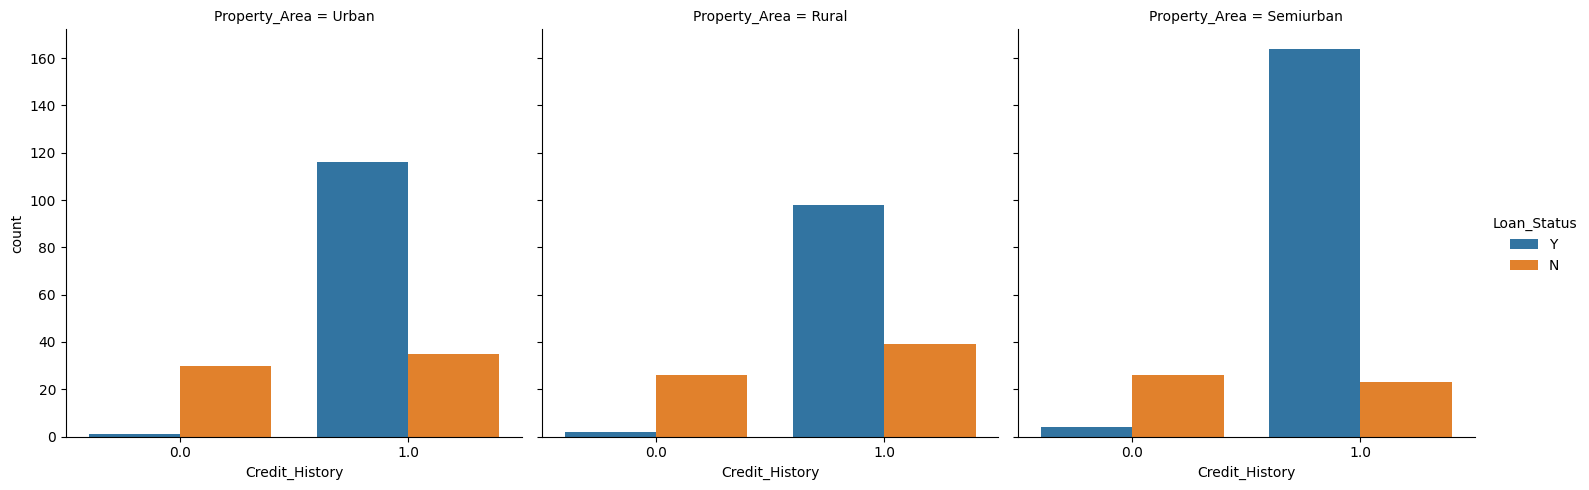

In [43]:
# Stacked bar plots for two categorical variables
sns.catplot(data=train, x='Credit_History', hue='Loan_Status', kind='count', col='Property_Area', col_wrap=3)
plt.show()

## Missing Value and Outlier Treatment 

After the exploring the data we need to find out the missing value and treat the outliers,because the presence of outliers may lead to reduce the accuracy of the model.we will see how many missing values are present in the train and dataset .we will visulaize the missing values in the train dataset by using heat map.

In [44]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

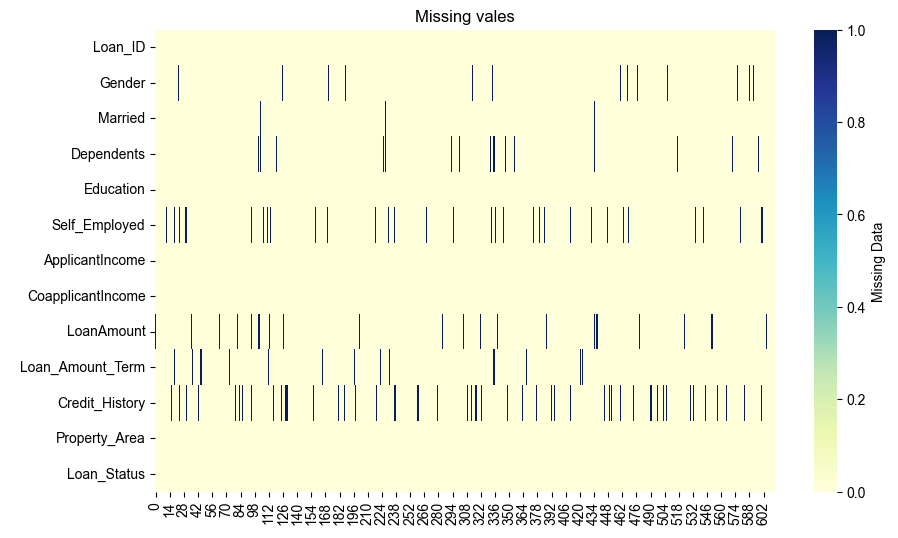

In [45]:

plt.figure(figsize=(10,6))
sns.heatmap(train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title("Missing vales")
sns.set(font_scale=1)


There are missing values in Credit_History,Loan_Amount_Term,LoanAmount,Self_Employed,Dependents,Married, Gender<br>
we will treat the missing features one by one.<br>
There are two ways to fill missing values.They are
- **For Numerical Value**: Replace the value by using Mean or Median
     - Mean   : when numerical values and normally disributed/symmetric
     - Median : When numerical values are asymmetric/ not normally distributed
- **For Categorical value**: Replace the value by using Mode.
    - Mode : When categorical values ,symm/non symmetric(skweness)

We will use mode for Gender,Dependents, Married, self_employed and Credit_history.Because they are categorical values

In [46]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

We have to fill the miss values in LoanAmount and Loan_Amount_Term. Let us see the frequency of data in Loan_Amount_Term

In [47]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan ampunt term variable, the value of 360 is repeating the most.So we will replace the missing values in the variable using the mode of this variable.<br>And in LoanAmount we will use median instead of mean,because there were more outliers present in this section so considering median gives a good approach 

In [48]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [49]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Now we will treat the missing values in the testing dataset.

In [51]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [52]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution.<br>
We must take steps to remove outliers from our datasets<br>
Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer.This is called Skewness.<br>
One way to remove the skewness is by doing the log transformation.<br>
As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.So, we get a distribution similar to normal distribution


## Labeling the data:

In [53]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)



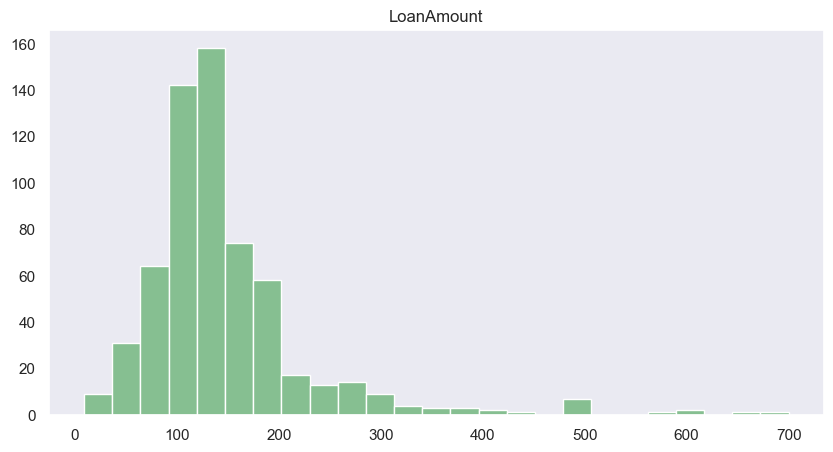

In [54]:
ax = train.hist(column='LoanAmount', bins=25, grid=False, figsize=(10,5), color='#86bf91')


In [55]:
train.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Dependents,1.015551,-0.347376
ApplicantIncome,6.539513,60.540676
CoapplicantIncome,7.491531,84.956384
LoanAmount,2.743053,10.936695
Loan_Amount_Term,-2.402112,6.924993
Credit_History,-2.021971,2.095179
Loan_Status,-0.809998,-1.348306


 ####   Skewness<br>
**Fairly Symmetrical**     : -0.5 to 0.5<br>
   **Moderate Skewed**     : 0.5 to -1.0 and 0.5 to 1.0<br>
     **Highly Skewed**     : -1.0 and > 1.0

We will try to reduce the skewwness of LoanAmount, beacuse remining features having more skewness.

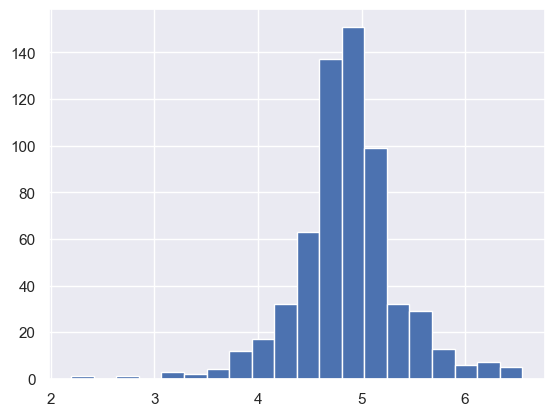

In [56]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [57]:
train.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Dependents,1.015551,-0.347376
ApplicantIncome,6.539513,60.540676
CoapplicantIncome,7.491531,84.956384
LoanAmount,2.743053,10.936695
Loan_Amount_Term,-2.402112,6.924993
Credit_History,-2.021971,2.095179
Loan_Status,-0.809998,-1.348306
LoanAmount_log,-0.195355,2.818819


we have reduced the skewness of LoanAmount by using log tranfomation, even we apply skewness in remaining features it does not give a big difference.Now we will drop the column we have added,i.e, LoanAmount_log

In [58]:
train=train.drop('LoanAmount_log',axis=1)
test=test.drop('LoanAmount_log',axis=1)

In [59]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


Let us drop the Loan_ID feature from both train and test data

In [60]:
train=train.drop(['Loan_ID'],axis=1)
test=test.drop(['Loan_ID'],axis=1)

In [61]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


Let us drop Loan_Status in train dataset and assign to a new variable called X and add the feature to a new variable to y.<br>
And apply get_dummies to the categorical features for both X and test data set.<br>
**get_dummies** is used to convert categorical values to numerical values

In [62]:
X=train
X=X.drop('Loan_Status',1)
y=train.Loan_Status

In [63]:
y=train.Loan_Status

In [64]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [65]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [66]:
train.shape

(614, 21)

In [67]:
X.shape

(614, 20)

In [68]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1


In [69]:
test.shape

(367, 20)

In [70]:
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0


In [71]:
train.columns


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [72]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [73]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [74]:
X.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

## Building Model


#### Logistic Regression
- Logistic Regression is a classification algorithm.It is used to predict a binary outcome(1/0, Yes/No, True/False) given a set of independent variables.
- Logistic Regression is a estimation of Sigmoid function.The function maps any real value into another value between 0 and 1.
- We use sigmoid to map predictions to probabilities.
- This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function.

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=41)

In [118]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Let us find out the accuracy ,precision ,recall and f1 score of the model.
- **Accuracy:** It is an evaluation metric that measures the number of correct predictions made by a model in relation to the total number of predictions made
- **Precision:** Precision is calculated by dividing the true positives by anything that was predicted as a positive
- **Recall :**Recall (or True Positive Rate) is calculated by dividing the true positives by anything that should have been predicted as positive
- **F1-Score:**The F1 score is defined as the harmonic mean of precision and recall.

In [119]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [120]:
accuracy

0.8089430894308943

In [79]:
pred_test=model.predict(test)

In [80]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [121]:
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))

Accuracy: 0.81
Precision: 0.79
Recall: 0.97
F1-score: 0.87


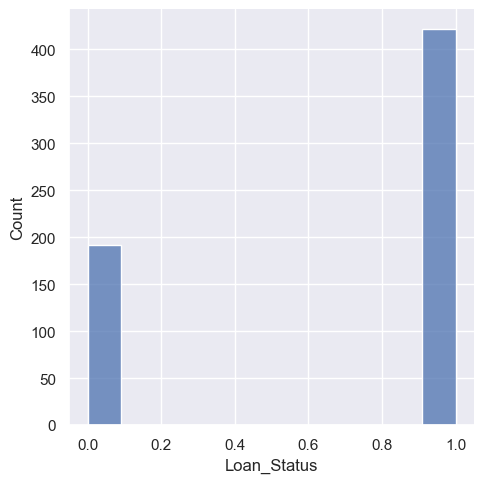

In [82]:
sns.displot(y)

In [83]:
Counter(y)

Counter({1: 422, 0: 192})

**Sampling Techniques for Imbalanced data**:
If we see the counter of target variable we have more data regarding to class 1, while less data for class 0.So,we less data regarding with class 0 than class 1 which may reduce the accuracy, to deal with we will use the sampling techniques.

In [84]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X,y,cv=5)


In [85]:
score.mean()

0.8045581767293083


**cross_val_scor**e evaluates the score using cross validation by randomly splitting the training sets into distinct subsets called folds, then it trains and evaluated the model on the folds, picking a different fold for evaluation every time and training on the other folds.

**StratifiedKFold** procedure divides a limited dataset into k non-overlapping folds. Each of the k folds is given an opportunity to be used as a held-back test set, whilst all other folds collectively are used as a training dataset. A total of k models are fit and evaluated on the k hold-out test sets and the mean performance is reported

The general procedure is as follows:

- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
- Take the group as a hold out or test data set
- Take the remaining groups as a training data set
- Fit a model on the training set and evaluate it on the test set
- Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores

In [86]:
from sklearn.model_selection import StratifiedKFold
accuracy=[]
skf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    x1_train,x1_test=X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(x1_train,y1_train)
    predict=model.predict(x1_test)
    pred=model.predict_proba(x1_test)[:,1]
    
    score=accuracy_score(predict,y1_test)
    accuracy.append(score)
    

print(accuracy)

[0.8048780487804879, 0.8373983739837398, 0.7967479674796748, 0.8130081300813008, 0.8032786885245902]


In [87]:
logistic=np.array(accuracy).mean()

In [88]:
logistic

0.8110622417699587

In [89]:
pred1=model.predict(test)

In [90]:
pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

**What is ROC Curve?**
- An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.particulary, the roc curve plots FPR on X-axis and the TPR on Y-axis.
- where True Positive Rate(sensitivity)=True positive/(True Positive+False Negative)
- False Positive Rate= False Positive/(False Positive+True negative)

In [91]:
from sklearn.metrics import roc_curve

In [92]:
from sklearn import metrics

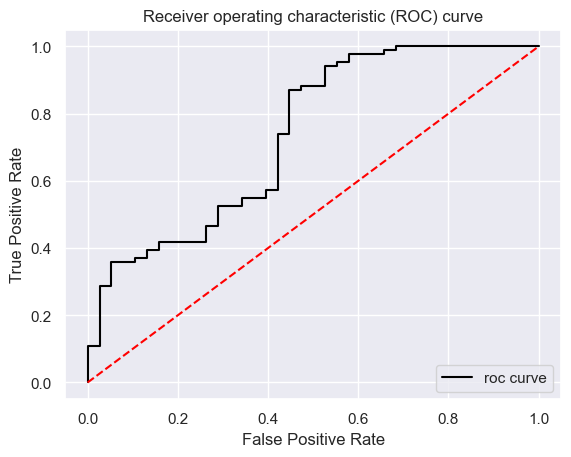

In [93]:
fpr, tpr, thresholds = roc_curve(y1_test, pred)
auc=metrics.roc_auc_score(y1_test,pred)
plt.plot(fpr, tpr, color='black', label="roc curve")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree:
- Image result for decision tree in machine learning Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.
- The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In [94]:
from sklearn import tree
accuracy=[]
skf= StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    #print("Train:",train_index,"Validation:",test_index)
    x1_train,x1_test=X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(x1_train,y1_train)
    predict=model.predict(x1_test)
    pred=model.predict_proba(x1_test)[:,1]
    
    score=accuracy_score(predict,y1_test)
    accuracy.append(score)


print(accuracy)

[0.7235772357723578, 0.7317073170731707, 0.6341463414634146, 0.6747967479674797, 0.7377049180327869]


In [95]:
decision=np.array(accuracy).mean()

In [96]:
decision

0.700386512061842

 ## Random Forest :
- Random forest is a supervised Machine Learning algorithm. This algorithm creates a set of decision trees from a few randomly selected subsets of the training set and picks predictions from each tree.
- it works well with the large dataset.

In [97]:
from sklearn.ensemble import RandomForestClassifier
accuracy=[]
skf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    #print("Train:",train_index,"Validation:",test_index)
    x1_train,x1_test=X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    model=RandomForestClassifier(n_estimators=50,random_state=1)
    model.fit(x1_train,y1_train)
    predict=model.predict(x1_test)
    pred=model.predict_proba(x1_test)[:,1]
    
    score=accuracy_score(predict,y1_test)
    accuracy.append(score)


print(accuracy)

[0.8048780487804879, 0.8373983739837398, 0.7642276422764228, 0.7804878048780488, 0.7295081967213115]


In [98]:
random=np.array(accuracy).mean()

In [99]:
random

0.7833000133280021

## Naive Bayesian :
- Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms.
- It works well with the small dataset.
- Gaussian Naive Bayes (GNB) is a classification technique used in Machine Learning (ML) based on the probabilistic approach and Gaussian distribution.
- Gaussian Naive Bayes assumes that each parameter (also called features or predictors) has an independent capacity of predicting the output variable


In [100]:
from  sklearn.naive_bayes import GaussianNB
accuracy=[]
skf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    #print("Train:",train_index,"Validation:",test_index)
    x1_train,x1_test=X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    model=GaussianNB()
    model.fit(x1_train,y1_train)
    predict=model.predict(x1_test)
    pred=model.predict_proba(x1_test)[:,1]
    
    score=accuracy_score(predict,y1_test)
    accuracy.append(score)


print(accuracy)

[0.7967479674796748, 0.8373983739837398, 0.7560975609756098, 0.7804878048780488, 0.7868852459016393]


In [101]:
naive=np.array(accuracy).mean()

In [102]:
naive

0.7915233906437426

## XGBoost
- XGBoost, which stands for Extreme Gradient Boosting.XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.
- XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable
- XGBoost is an implementation of gradient boosted decision trees designed for speed and performance




In [103]:
from xgboost import XGBClassifier
accuracy=[]
skf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    #print("Train:",train_index,"Validation:",test_index)
    x1_train,x1_test=X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    model= XGBClassifier()
    model.fit(x1_train,y1_train)
    predict=model.predict(x1_test)
    pred=model.predict_proba(x1_test)[:,1]
    
    score=accuracy_score(predict,y1_test)
    accuracy.append(score)

In [104]:
xgb=np.array(accuracy).mean()

In [105]:
xgb

0.7784219645475142

### Comparison between models:
 So far now we have applied 5 models ,those are Logistic Regression, Decision Tree, Random Tree, Naive - Bayes , XGB. 

In [106]:
x=[0.7784219645475142,0.7915233906437426,0.7833000133280021,0.700386512061842,0.8110622417699587]

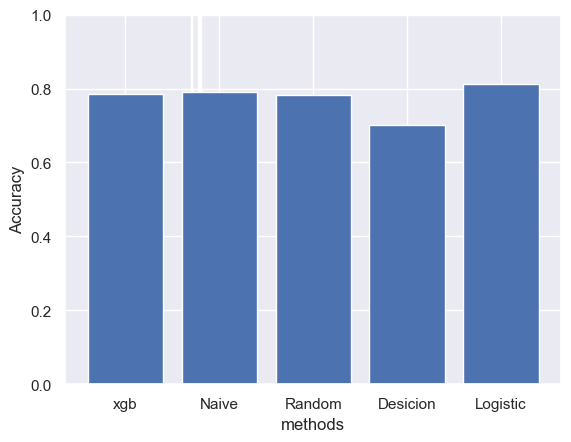

In [107]:
plt.hist(x)
names = ['xgb', 'Naive','Random','Desicion', 'Logistic']
plt.bar(names, x)
plt.xticks(names)
plt.ylim(0.0,1.0)
plt.xlabel('methods')
plt.ylabel('Accuracy')
plt.show()

From above all  models we got more accuracy in Logistic Regression.